# 2. Code Beschreibung CodeArray
Durch Drücken der **tab** Taste wird Emotionserkennung der Teilnehmer neu durchgeführt.
Durch Drücken der **esc** Taste wird das Programm gestoppt.

## 2.1 Verwendete Packages

In [1]:
import os
import time
import datetime

from feat import Detector
from feat.utils.io import get_test_data_path
from feat.plotting import imshow

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pygetwindow as gw
from pynput import keyboard
#import pyautogui
#import keyboard

import cv2
import mss



## 2.2 Funktion *show_data_window(werte)*
Visualisierung der Ergebnisse mit *matplotlib*.

**Beschreibung:** *werte* übergibt die ermittelten Emotionen in einem Array aus Zahlen.

**Anmerkung:** Die Visualisierung der Ergebnisse durch plt.show() hat zu verantworten, dass der Code nicht loopt. Erst wenn das Plotfenster geschlossen wird, wird der Main-Loop fortgesetzt und die Emotionen neu ermittelt.

In [2]:
def show_data_window(werte):
    
    # Werte werden gelabelt
    Index = ['anger','disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']
    
    # Plotfenster wird geöffnet und benannt
    fig, ax = plt.subplots(num = 'Emotion Analysis')
    
    # Achsenzuordnung
    ax.bar(Index, werte)
    
    # Achsenbeschriftung
    ax.set_xlabel('Emotion')
    ax.set_ylabel('Wert')
    ax.set_title('Emotionswerte')
    
    # Plot wird erstellt
    plt.show()
    

## 2.3 Funktion *bring_zoom_meeting_to_front()*
Interaktionen mit Zoom-Fenster.

**Beschreibung:** Die Größe des Videokonferenz-Fenster wird erkannt und angepasst. Es besteht die Möglichkeit, das Meeting-Fenster in den Vordergrund zu holen.

**Anmerkung:** Der Name des Videokonferenz-Fensters muss evtl. an das jeweilige Videokonferenz-Tool angepasst werden (z. B. Meeting oder Teams...).

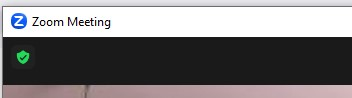

In [1]:
def bring_zoom_meeting_to_front():
    
    # Den Fenstertitel des Zoom-Meetings angeben
    zoom_window_title = "Zoom Meeting"
    
    # Das Zoom-Meeting-Fenster suchen und in den Vordergrund bringen
    zoom_window = gw.getWindowsWithTitle(zoom_window_title)[0]
    #zoom_window.restore()  # Das Fenster wiederherstellen, falls es minimiert ist
    #zoom_window.maximize()  # Das Fenster maximieren
    
    # Die Position und Größe des Zoom-Meeting-Fensters abrufen
    left, top, right, bottom = zoom_window.left, zoom_window.top, zoom_window.right, zoom_window.bottom
    
    #Rückgabe Größe des Meeting-Fensters
    return zoom_window


## 2.4 Funktion *take_screenshot(zoom_window, anz_screenshots*
Bildschirmaufnahmen werden erstellt.

**Beschreibung:** Anzahl der in *main()* angegebenen Screenshots *anz_screenshots* werden nacheinander aufgenommen und der Liste *screenshot_list* angehängt. Es wird nur der Bereich des Bildschirms aufgenommen, der über *zoom_window* übergeben wurde.

In [4]:
def take_screenshot(zoom_window, anz_screenshots):
    
    # Aktuellen Zeitstempel für den Dateinamen generieren
    timestamp = time.strftime("%Y%m%d-%H%M%S", time.localtime())
    screenshot_list = []
    screenshot_name_list = []
    count = True
    
    monitor = {"top": zoom_window.top, "left": zoom_window.left, "width": (zoom_window.right-zoom_window.left), "height": (zoom_window.bottom - zoom_window.top)}
   
    with mss.mss() as sct:
        while True:
            
            # Screenshot des ausgewählten Bereichs aufnehmen
            #screenshot = pyautogui.screenshot(region=region)
            img = np.array(sct.grab(monitor))
            screenshot_list.append(img)
            
            # Screenshot wird benannt
            screenshot_name = f"screenshot_{timestamp}"
            screenshot_name_list.append(f"screenshot_{timestamp}")

            # Speichern des Screenshots
            # Dateipfad und Name für den Screenshot
            #screenshot_path = f"./data/screenshot_{timestamp}.png"
            #screenshot.save(f"./data/{screenshot_name}.png")
            #print (count)
                   
            if count == anz_screenshots:
                break
            count += 1
            
    #print(f"Screenshot saved: screenshot_{timestamp}.png")
    return screenshot_list


## 2.5 Funktion *pyFeat(screenshot_list,anz_screenshots)*
Die Emotion der Gesichter auf den Screenshots werden mithilfe der Toolbox pyFeat erkannt. <https://py-feat.org/pages/intro.html>

**Beschreibung:** Die Emotionen 'anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral' werden in Zahlenwerten zwischen 0 und 1 angegeben.

In [5]:
def pyFeat(screenshot_list,anz_screenshots):
    
    # Detektor einrichten
    detector = Detector( 
	face_model = "retinaface",
	landmark_model = "mobilefacenet",
	au_model = 'xgb',
	emotion_model = "resmasknet",
    Facepose_model = "img2pose",)
    
    vorhersage_list = []
    emotion_sum =[]
    
    # Emotionserkennung wird durchgeführt und in Arrays gespeichert
    for i in screenshot_list:
        frame=i
        
        #Gesichtserkennung
        detected_faces = detector.detect_faces(frame)
        
        #Landmarks ermitteln
        detected_landmarks = detector.detect_landmarks(frame, detected_faces)
        
        #Emotionen bestimmen
        vorhersage = detector.detect_emotions(frame, detected_faces, detected_landmarks)
        vorhersage_list.append(vorhersage)

    
    # Elementweise Addition der Arrays 
    for au in vorhersage_list:
        for inn in au:
            # Emotion der einzelnen Bilder wird zusammenaddiert
            emotion_sum.append(np.sum(inn, axis = 0))
            #print(inn)
     
    #Mittelwertbildung
    emotion = np.mean(emotion_sum, axis = 0)
    
    #Skalierung der Werte auf 1
    emotion_sk = np.divide(emotion, np.sum(emotion))
    
    print("---------------------------------------------------------------------")
    #print(emotion_sum)
    #print(emotion_sk)
    print("---------------------------------------------------------------------")
    
    # Emotionsarray wird zurückgegeben
    return emotion_sk


## 2.6 Funktion *visualisieren(werte)*
Diese Funktion leitet bis jetzt nur zu Funktion *show_data_window()* weiter.

**Beschreibung:** Dient der Ausgabe des Ergebnisses.

In [6]:
def visualisieren(werte):
    
    print(f'die Summe ist {np.sum(Werte)}')
    show_data_window(werte)
    #print(Werte)
   

## 2.7 Funktion *on_release(key)*

**Beschreibung:**
Code loopt nicht, da Programm bei Funktion show_data_window() bei visualisierung des Graphen stoppt. Durch drücken der **tab** Taste wird neue Emotionserkennung gestartet. Durch drücken der **esc** Taste wird das Programm gestoppt.

*on_release()* läuft durchgehend im Hintergrund. Wird eine Taste gedrückt so wird bei Loslassen der Taste überprüft, welche betätigt wird.

In [7]:
def on_release(key):
    
    # Funktion läuft durchgehend im Hintergrund.
    #Globsle Variable running
    global running
    
    # Programm wird durch esc Taste gestoppt.
    if key == keyboard.Key.esc:
        running = False;
        plt.close() 
        
    # Programm wird durch tab Taste fortgesezt, dadurch startet eine neue Emotionserkennung  
    elif key == keyboard.Key.tab:
        
        #Schließen des Fensters
        plt.close()



## 2.8 Funktion *main()*

Hauptprogramm.

**Beschreibung** Solange *running=True* werden folgende Funktionen im Loop ausgeführt:

-*region = bring_zoom_meeting_to_front()*: Ermittelt Position und Größe des Zoom_Fenster und bringt es in den Vordergrund.

-*screenshot_list = take_screenshot(region, anz_screenshots)*: Aufnahme von Screenshots des Zoom-Fensters.

-*emotion = pyFeat(screenshot_list,anz_screenshots)*: Detektion der Emotionen auf den Schreenshots.

-*visualisieren(emotion)*: Visualisierung der detektierten Emotionen mittels eines Diagramms.

Sobald *running=False* wird der Loop unterbrochen und der Keyboard-Listener mit *Listeneer.stop()* gestoppt.

**Anmerkung:** Über *anz_screenshots* wird die Anzahl der aufzunemenden Schreenshots festgelegt.


In [8]:
def main():        
    
    #Anzahl an Screenshots die Aufgenommen werden sollen
    anz_screenshots = 10
    # Debugging Purpose dauer eines Programmdurchlaufs bestimmen.
    timestamp = time.strftime("%Y%m%d-%H%M%S", time.localtime())
    while running:

        
        screenshot_list = []
        # Zoom-Fenster wird erkannt
        region = bring_zoom_meeting_to_front()
        # Screenshot wird erstellt
        screenshot_list = take_screenshot(region, anz_screenshots)
        # Emotion wird erkannt
        emotion = pyFeat(screenshot_list,anz_screenshots)
        # Emotion wird Visualisiert
        visualisieren(emotion)
        timestamp = time.strftime("%Y%m%d-%H%M%S", time.localtime())
        print(timestamp)
            
    listener.stop()
    print("stopped!")
    

## 2.9 Startet das Hauptprogramm

**Beschreibung:**
Initialisiert und startet *keyboard_Listener*.Dieser erkennt Tastatureingabe bei Loslassen der Taste.
*main()*-Funktion wird aufgerufen.


In [ ]:
# Starte das Hauptprogramm

#Setze 
running = True

#Initialisiert Keyboard-Listener; Erkennung von Tastatureingabe bei Loslassen der Taste.
# run listener in background so that the while loop gets executed
listener = keyboard.Listener(on_release=on_release)

# Start des Keyboard-Listeners
listener.start()

#Aufruf des Main-Loops
main()


C:\Users\ferdi\anaconda3\envs\IoT\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


---------------------------------------------------------------------
---------------------------------------------------------------------
die Summe ist 1.0
20230709-094751


C:\Users\ferdi\anaconda3\envs\IoT\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
